**Frozen Lake**

Let's play!

 "*Winter is here. You and your friends were tossing around a frisbee at the park  when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.*"

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)

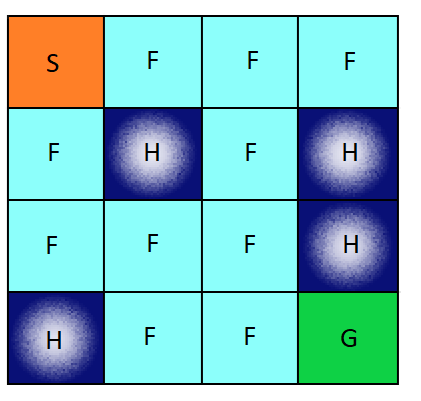

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

*The description of the environment is provided from: https://gym.openai.com/envs/FrozenLake-v0/ 


Before playing, the necessary libraries must be implemented. Once you run the cell, you will have all the tools you need to venture into the winter. 

In [ ]:
!pip install gym
!pip install ipython

#Imports of all the libraries needed to perform the first part of the homework
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

Now, it is necessary to create Frozen Lake environment and the **Q table**, since it contains the probabilities for each action-state pairs.

Do you remember it?

In [ ]:
env=gym.make("FrozenLake-v1").env #Creation of the environment

#Number of actions and states in this environment
action_space_size = env.action_space.n 
state_space_size = env.observation_space.n 

#########TO DO########## 
q_table= None #Initialization of the q table
########################

print('Q_table: \n', q_table)

The red box you can see on the environment corresponds to the agent. When running the last cell of this notebook, your agent should be moving towards the frisbee (G). 

In [ ]:
state = env.reset() #Environment at the initial state
env.render() #Visualization of the environment

Reinforcement learning, as other types of learning (supervised and unsupervised), contains parameters that affect the performance of the model. Therefore, in this section. Run the hyperparameters and the values assigned for them.  

**You will be playing with those hyperparameters in a while!**

In [ ]:
#Parameters
num_episodes=10000
max_steps_per_episode=100

learning_rate=0.1
discount_rate=0.99

exploration_rate = 1
max_exploration_rate=1
min_exploration_rate=0.01
exploration_decay_rate=0.001

Q-learning? What is it? **:o**

Q-learning is a reinforcement learning technique, and its objective is to learn the optimal policy that will help the agent find the best action to take and thus, maximize rewards.

Here, you will understand main concepts like exploration vs. exploitation and also how the Q table is updated. 

In [ ]:
rewards_all_episodes = []

#Q-learning algorithm
for episode in range(num_episodes):
    state=env.reset()
    
    done=False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        #Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            #########TO DO##########
            action=None
            ########################
        else:
            action=env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        #Update Q-table for Q(s,a)
        q_table[state,action]=q_table[state,action]*(1-learning_rate)+ learning_rate*(reward +discount_rate*np.max(q_table[new_state,:]))
        
        state=new_state
        rewards_current_episode +=reward
        
        if done==True:
            break
        
    #Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)

In [ ]:
#Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count=1000
print("**********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count,": ", str(sum(r/1000)))
    count += 1000

You will have your Q table updated. There are different values? What does that mean? You must discuss the results later in your report.

In [ ]:
#Print updated Q-table
print("\n\n**********Q-table***************\n")
print(q_table)

Are you ready to see your agent find the frisbee? 

The viewing is set to run for three episodes.  

In [ ]:
#Visualize what happen during 3 episodes
for episode in range(3):
    state=env.reset()
    done=False
    print("****EPISODE ", episode+1,"*********\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward==1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("*****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
    
        state=new_state
        
env.close()

We hope you enjoyed this frozen adventure! It is time to answer the questions you find on GitHub and perform part two of the homework.

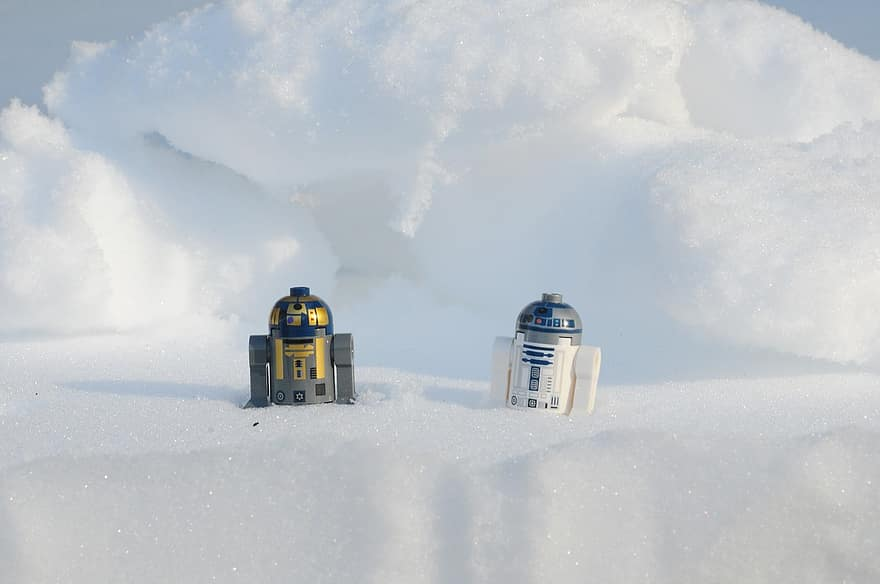